In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

%matplotlib inline

In [56]:
wine=pd.read_csv('C:/Users/LIKITHA M/Downloads/WineQT.csv')

In [57]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [58]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [59]:
wine.shape

(1143, 13)

In [60]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [61]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [62]:
round(100*(wine.isnull().sum()/len(wine)),2).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

In [63]:
round(100*(wine.isnull().sum(axis=1)/len(wine)),2).sort_values(ascending=False)

0       0.0
760     0.0
766     0.0
765     0.0
764     0.0
       ... 
387     0.0
388     0.0
389     0.0
390     0.0
1142    0.0
Length: 1143, dtype: float64

In [64]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [65]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


plotting

In [66]:
y=wine['quality']
x=wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']]

In [67]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [68]:
wine.quality.value_counts().sort_index()

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

C:\Users\LIKITHA M\AppData\Local\Temp\ipykernel_18236\1066348052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine["quality"])
C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

<Axes: xlabel='quality', ylabel='Density'>

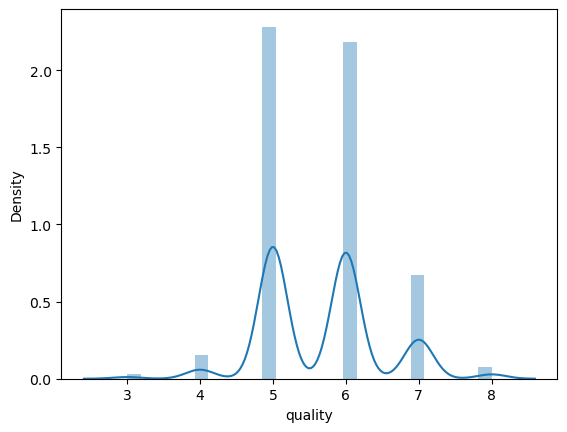

In [69]:
sns.distplot(wine["quality"])

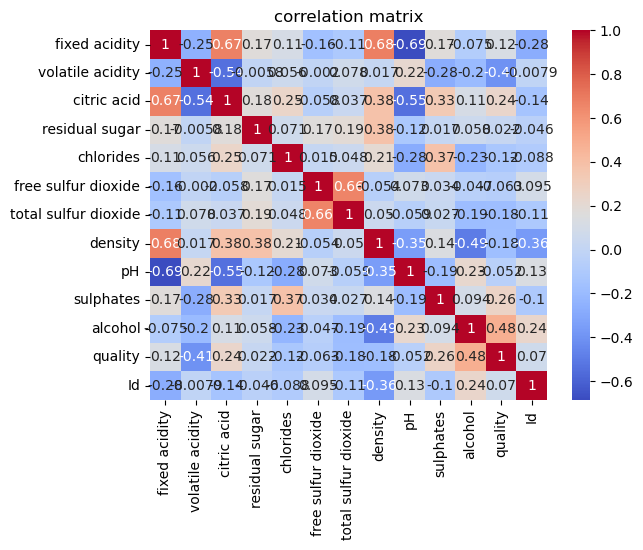

In [70]:
co_matrix=wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']].corr()
sns.heatmap(co_matrix,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


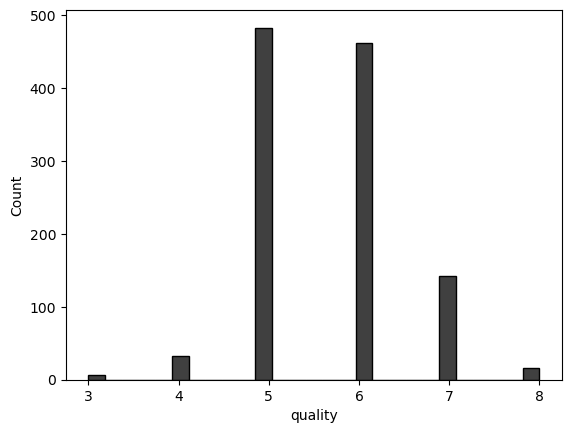

In [71]:
sns.histplot(wine["quality"],color='black')
plt.show()

In [72]:
corel=wine.corr()['quality'].drop('quality')
print(corel)

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
Id                      0.069708
Name: quality, dtype: float64


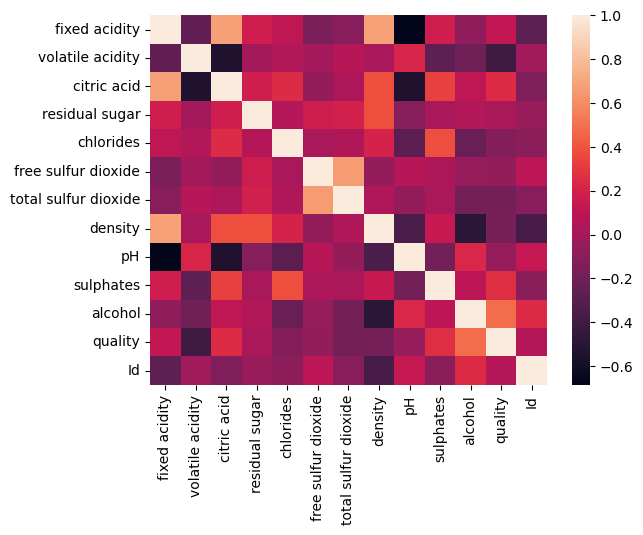

In [73]:
sns.heatmap(wine.corr())
plt.show()

In [74]:
corel.sort_values(ascending=False)

alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [77]:
winelr=LinearRegression()

In [78]:
winelr.fit(x_train,y_train)

LinearRegression()

In [79]:
winelr.coef_

array([ 2.17319674e-16,  1.11188958e-15, -1.60250779e-15,  1.28454252e-16,
        2.15557516e-15,  3.92535464e-16, -2.02104106e-16, -1.39698228e-13,
        1.12356137e-16, -4.19230461e-17, -6.60523139e-16,  1.00000000e+00,
        2.98995050e-19])

In [80]:
pd.DataFrame(winelr.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,2.173197e-16
volatile acidity,1.111890e-15
citric acid,-1.602508e-15
residual sugar,1.284543e-16
chlorides,2.155575e-15
free sulfur dioxide,3.925355e-16
total sulfur dioxide,-2.021041e-16
density,-1.396982e-13
pH,1.123561e-16
sulphates,-4.192305e-17


In [81]:
pr = winelr.predict(x_test)

In [82]:
r2_score(y_test,pr)

1.0

In [83]:
mean_absolute_error(y_test,pr)

3.806755977885034e-15

In [84]:
mean_squared_error(y_test,pr)

3.1896333347893683e-29

In [85]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

predictions

In [86]:
print(winelr.predict([[15,0.01,0,5,0.001,30,50,0.95,3,0.9,15,9.28,0.09]]))

[9.28]


C:\Users\LIKITHA M\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
x=sm.add_constant(x_train)
model=sm.OLS(y_train,x).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.241e+28
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:45:37   Log-Likelihood:                 26520.
No. Observations:                 914   AIC:                        -5.301e+04
Df Residuals:                     900   BIC:                        -5.294e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.027e-13 

In [88]:
y_pred = winelr.predict(x_test)
print("MEan Squared Error (MES):",mean_squared_error(y_test,y_pred))

MEan Squared Error (MES): 3.1896333347893683e-29


In [89]:
print(wine['quality'].unique())

[5 6 7 4 8 3]


In [90]:
def mape(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    return np.mean(np.abs((actual-pred)/actual))*100

In [92]:
mape(y_test,y_pred)
#MAPE result Notes :

#Below 10% = Excellent
#10%~20% = Good
#21%~50% = Reasonable
#Above 50% = Inaccurate

6.913302674487454e-14

So the conclusion that we got, our MAPE result is 6.913302674487454e-14 which is approximately 7% (Excellent)

In [95]:
prediction=winelr.predict(x_test)

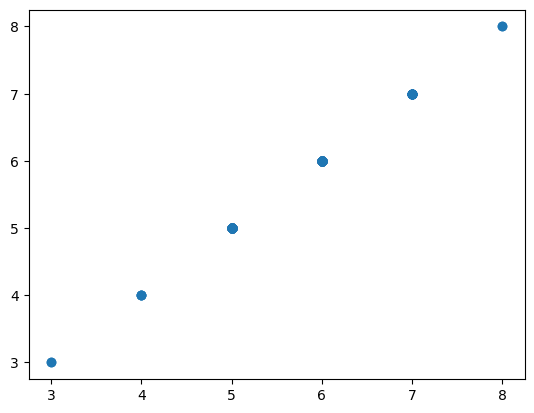

In [96]:
plt.scatter(y_test, prediction)

C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LIKITHA M\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


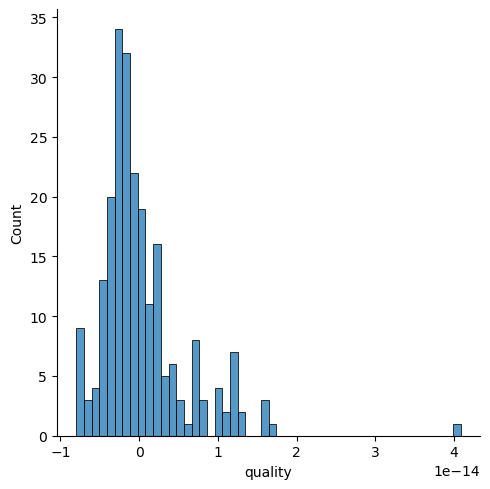

In [98]:
sns.displot((y_test-prediction),bins=50);